In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
# Constants for dataset
TRAIN_DATA_DIR = r'C:\Users\ASUS VivoBook\Desktop\age_prediction\train'
TEST_DATA_DIR = r'C:\Users\ASUS VivoBook\Desktop\age_prediction\test'
IMG_SIZE = (100, 100)
BATCH_SIZE = 32
NUM_CLASSES = 100

In [3]:
# Function to preprocess the image for the CNN model
def preprocess_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, IMG_SIZE)
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)
    image = image / 255.0  # Normalize pixel values to [0, 1]
    return image

In [4]:
# Build the CNN model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(100, 100, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(optimizer=Adam(), loss='mean_squared_error', metrics=['mae'])

In [5]:
# Data Augmentation
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    TRAIN_DATA_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    TEST_DATA_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

Found 185632 images belonging to 100 classes.
Found 47568 images belonging to 100 classes.


In [6]:
# Train the model
history = model.fit(train_generator, epochs=20, validation_data=test_generator)

Epoch 1/20
5801/5801 [==============================] - 4725s 814ms/step - loss: 0.0101 - mae: 0.0200 - val_loss: 0.0099 - val_mae: 0.0198
Epoch 2/20
5801/5801 [==============================] - 14088s 2s/step - loss: 0.0099 - mae: 0.0198 - val_loss: 0.0099 - val_mae: 0.0198
Epoch 3/20
5801/5801 [==============================] - 5647s 973ms/step - loss: 0.0099 - mae: 0.0198 - val_loss: 0.0099 - val_mae: 0.0198
Epoch 4/20
5801/5801 [==============================] - 3419s 589ms/step - loss: 0.0099 - mae: 0.0198 - val_loss: 0.0099 - val_mae: 0.0198
Epoch 5/20
5801/5801 [==============================] - 3531s 609ms/step - loss: 0.0099 - mae: 0.0198 - val_loss: 0.0099 - val_mae: 0.0198
Epoch 6/20
5801/5801 [==============================] - 3507s 604ms/step - loss: 0.0099 - mae: 0.0198 - val_loss: 0.0099 - val_mae: 0.0198
Epoch 7/20
5801/5801 [==============================] - 5962s 1s/step - loss: 0.0099 - mae: 0.0198 - val_loss: 0.0099 - val_mae: 0.0198
Epoch 8/20
5801/5801 [==========

In [7]:
# Save the trained weights
model.save_weights('age_detection_model.h5')

In [8]:
# Predict Accuracy
train_accuracy = history.history['mae'][-1]
validation_accuracy = history.history['val_mae'][-1]
print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Validation Accuracy: {validation_accuracy:.4f}")

Train Accuracy: 0.0198
Validation Accuracy: 0.0198


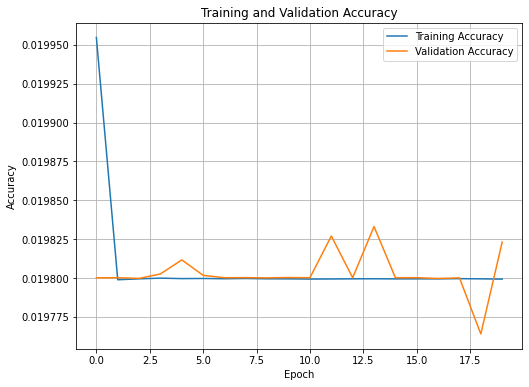

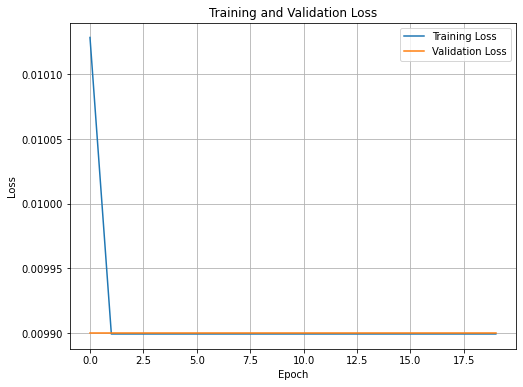

In [10]:
# Plot Training and Validation Accuracy
plt.figure(figsize=(8, 6))
plt.plot(history.history['mae'], label='Training Accuracy')
plt.plot(history.history['val_mae'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

# Plot Training and Validation Loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()